# 2.4 Fundamentals of Visualization Libraries Part 2
## Table of Contents:
### 1. Import libraries and latest dataset
### 2. Create a dual-axis plot with Seaborn
### 3. Picking one theme, style and palette
### 4. Bar chart of 20 most popular start stations
### 5. Box plot
### 6. FacetGrid

In [2]:
# To check memory limit:

import sys

print(sys.getrecursionlimit())

3000


In [3]:
sys.setrecursionlimit(10000)

### 1. Import libraries and latest dataset

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [5]:
conda list pandas

# packages in environment at /opt/anaconda3/envs/citibike_2022:
#
# Name                    Version                   Build  Channel
pandas                    2.2.2           py311he327ffe_0  

Note: you may need to restart the kernel to use updated packages.


In [6]:
conda list seaborn

# packages in environment at /opt/anaconda3/envs/citibike_2022:
#
# Name                    Version                   Build  Channel
seaborn                   0.13.2                   pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


In [7]:
conda list matplotlib

# packages in environment at /opt/anaconda3/envs/citibike_2022:
#
# Name                    Version                   Build  Channel
matplotlib                3.9.0                    pypi_0    pypi
matplotlib-inline         0.1.6           py311hecd8cb5_0  

Note: you may need to restart the kernel to use updated packages.


In [8]:
df = pd.read_pickle('ny_data_task2point3.pickle')

In [9]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-01-18,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member,1.8,44045,both
2022-01-18,75EAB4C9619AB463,classic_bike,2022-01-18 16:45:52,2022-01-18 16:56:03,W 49 St & 8 Ave,6747.06,Amsterdam Ave & W 73 St,7260.09,40.762272,-73.987882,40.779668,-73.980930,member,1.8,44045,both
2022-01-18,582C4FB96E010416,classic_bike,2022-01-18 08:45:24,2022-01-18 08:54:11,E 88 St & 1 Ave,7235.13,2 Ave & E 72 St,6925.09,40.778301,-73.948813,40.768762,-73.958408,member,1.8,44045,both
2022-01-18,4FAA081EE6A9B319,electric_bike,2022-01-18 18:12:01,2022-01-18 18:17:15,Clermont Ave & Lafayette Ave,4461.01,Emerson Pl & Myrtle Ave,4683.02,40.687645,-73.969689,40.693631,-73.962236,member,1.8,44045,both
2022-01-18,AA6CE6206341D731,electric_bike,2022-01-18 13:14:24,2022-01-18 13:25:50,Court St & State St,4488.08,Emerson Pl & Myrtle Ave,4683.02,40.690238,-73.992031,40.693631,-73.962236,member,1.8,44045,both


In [12]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')

### 2. Create a dual-axis plot with Seaborn

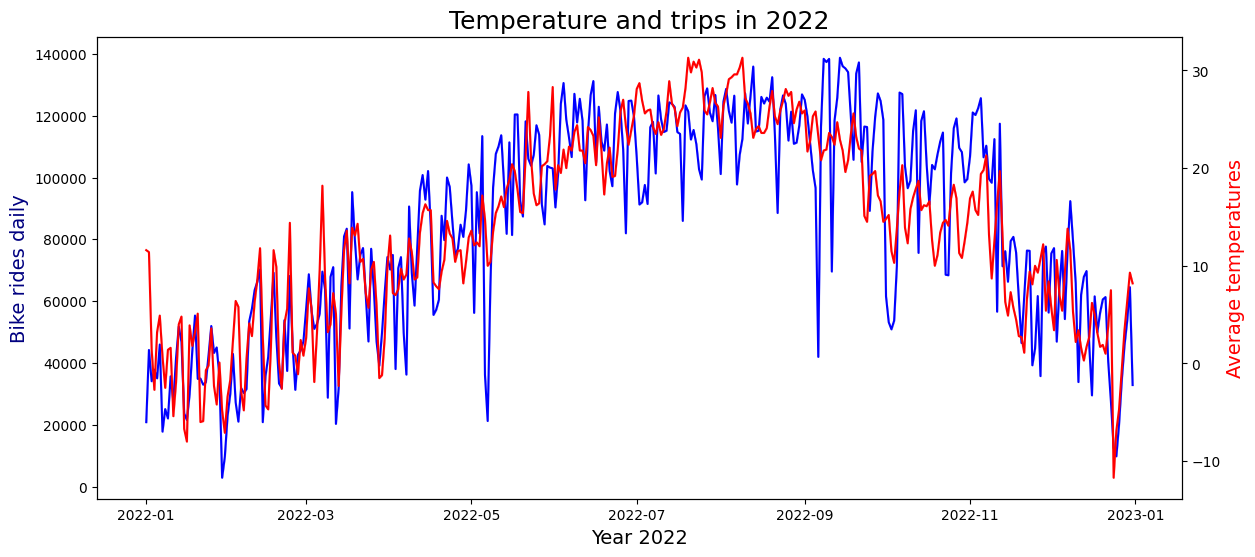

In [13]:
fig,ax = plt.subplots(figsize=(14, 6))
sns.lineplot(data = df['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

### 3. Picking one theme, style and palette

In [37]:
sns.set_theme(style = "ticks", palette = "BuGn_r")

### 4. Bar chart of 20 most popular start stations

In [38]:
df['value'] = 1

In [39]:
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [40]:
df_t

,start_station_name,value
0,1 Ave & E 110 St,22211
1,1 Ave & E 16 St,69320
2,1 Ave & E 18 St,72872
3,1 Ave & E 30 St,46688
4,1 Ave & E 39 St,54145
...,...,...
1756,Wyckoff Ave & Gates Ave,16931
1757,Wyckoff St & 3 Ave,255
1758,Wyckoff St & Nevins St,11753
1759,Wythe Ave & Metropolitan Ave,67866


In [41]:
top20 = df_t.nlargest(20, 'value')

In [42]:
top20

,start_station_name,value
1587,W 21 St & 6 Ave,131679
1718,West St & Chambers St,126290
495,Broadway & W 58 St,117797
286,6 Ave & W 33 St,109542
8,1 Ave & E 68 St,108412
461,Broadway & E 14 St,101115
485,Broadway & W 25 St,100784
1511,University Pl & E 14 St,100089
463,Broadway & E 21 St,97958
1603,W 31 St & 7 Ave,96157


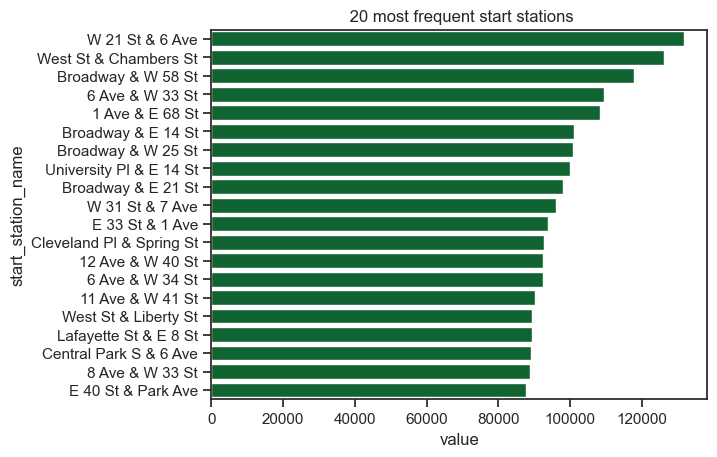

In [43]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title(" 20 most frequent start stations")
plt.show()

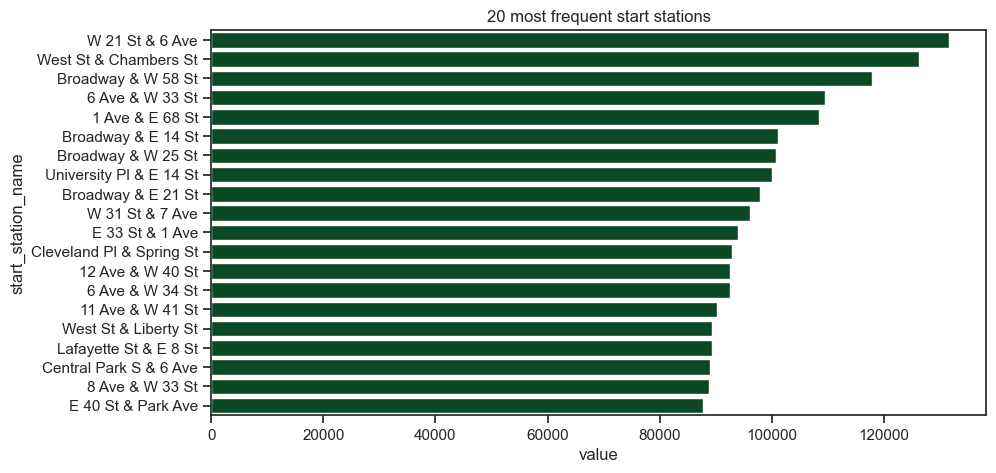

In [44]:
plt.figure(figsize = (10, 5))
with sns.color_palette('BuGn_r', n_colors = 20):
    sns.barplot(data = top20, x = 'value', y = 'start_station_name').set_title("20 most frequent start stations")

### Before the codes from the barplots above gave the correct colors from the palette. I decided then to first add the dual axis lineplot as I had to create that one on the df dataframe. After creating the dual-axis lineplot I now get different color results for the two barplots above even though I used the exact same code. I really do not understand why. If I add the hue like I do for the barplots below, I also get wrong colors. What do I do wrong?

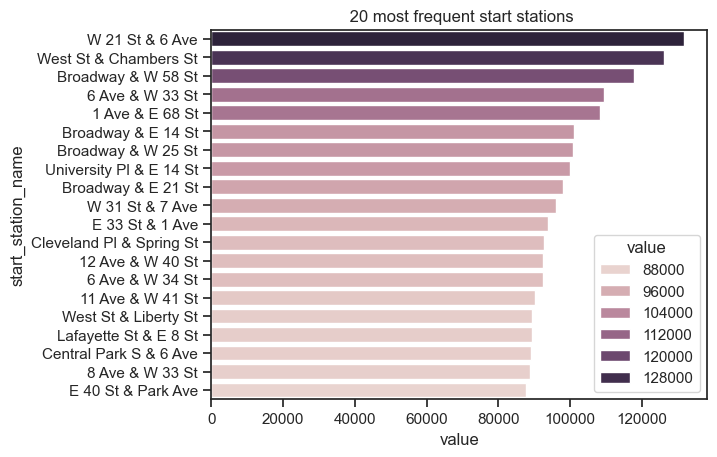

In [45]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name', hue = 'value')
plt.title(" 20 most frequent start stations")
plt.show()

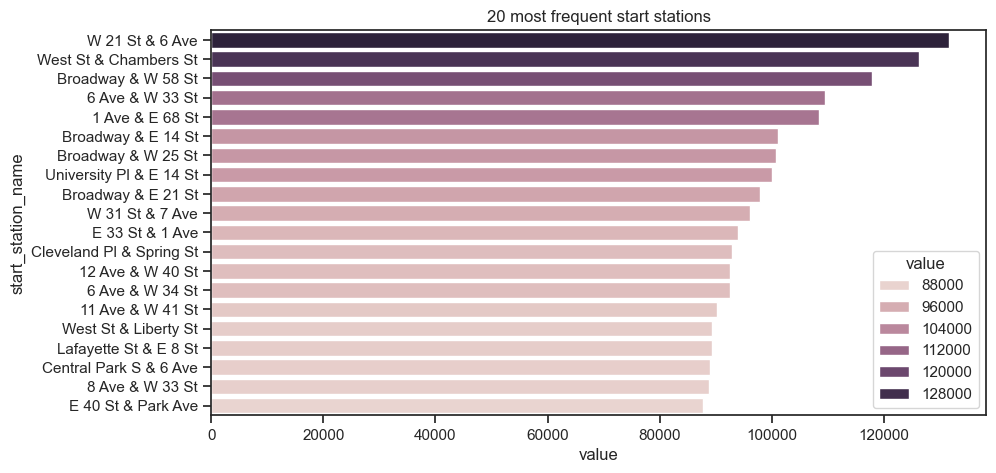

In [46]:
plt.figure(figsize = (10, 5))
with sns.color_palette('BuGn_r', n_colors = 20):
    sns.barplot(data = top20, x = 'value', y = 'start_station_name', hue = 'value').set_title("20 most frequent start stations")

### 5. Box plot

In [47]:
df.dtypes

ride_id                 object
rideable_type           object
started_at              object
ended_at                object
start_station_name      object
start_station_id        object
end_station_name        object
end_station_id          object
start_lat              float64
start_lng              float64
end_lat                float64
end_lng                float64
member_casual           object
avgTemp                float64
bike_rides_daily         int64
_merge                category
value                    int64
dtype: object

In [48]:
# df_rider = df.groupby('member_casual')['value'].count().reset_index()

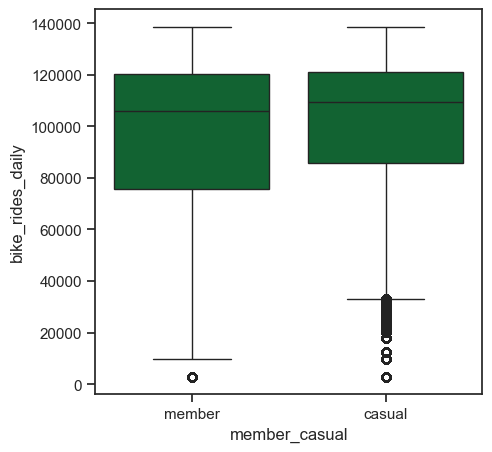

In [53]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'member_casual', y = 'bike_rides_daily', data = df)
plt.show()

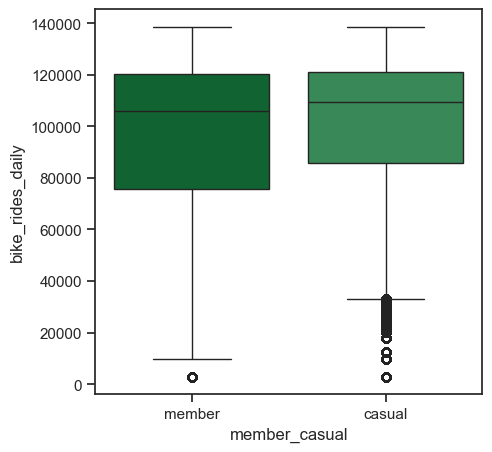

In [54]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'member_casual', y = 'bike_rides_daily', data = df, hue = 'member_casual')
plt.show()

### The casual bike riders have a lot more outliers and the boxplot is shifted a bit more upwards. The median is very close between the members and the casual bikeriders, around 11000 daily bikerides for casual bike riders and a bit less for members. The box and the values between the first and third quartile (25% and 75%) is bigger for the members.

### 6. FacetGrid

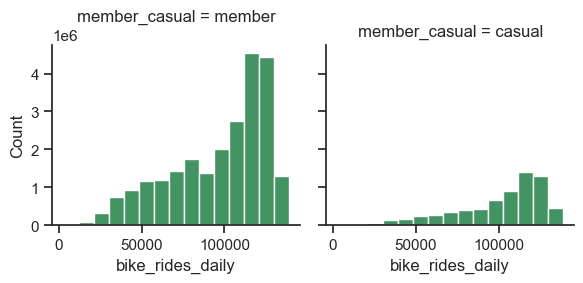

In [65]:
grid = sns.FacetGrid(df, col = "member_casual")
grid.map(sns.histplot, "bike_rides_daily", bins = 15)
plt.show()

### The FacetGrid shows clearly that there are a lot more members than casual bike riders. There are also a lot more daily bike rides made by members. For example on the days that there are a 100000 bikerides, 2 million are from members and around 600000 from casual bike riders.

In [66]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge,value
date,,,,,,,,,,,,,,,,,
2022-01-18,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member,1.8,44045,both,1
2022-01-18,75EAB4C9619AB463,classic_bike,2022-01-18 16:45:52,2022-01-18 16:56:03,W 49 St & 8 Ave,6747.06,Amsterdam Ave & W 73 St,7260.09,40.762272,-73.987882,40.779668,-73.980930,member,1.8,44045,both,1
2022-01-18,582C4FB96E010416,classic_bike,2022-01-18 08:45:24,2022-01-18 08:54:11,E 88 St & 1 Ave,7235.13,2 Ave & E 72 St,6925.09,40.778301,-73.948813,40.768762,-73.958408,member,1.8,44045,both,1
2022-01-18,4FAA081EE6A9B319,electric_bike,2022-01-18 18:12:01,2022-01-18 18:17:15,Clermont Ave & Lafayette Ave,4461.01,Emerson Pl & Myrtle Ave,4683.02,40.687645,-73.969689,40.693631,-73.962236,member,1.8,44045,both,1
2022-01-18,AA6CE6206341D731,electric_bike,2022-01-18 13:14:24,2022-01-18 13:25:50,Court St & State St,4488.08,Emerson Pl & Myrtle Ave,4683.02,40.690238,-73.992031,40.693631,-73.962236,member,1.8,44045,both,1


In [67]:
df.drop(columns = {'_merge'}, inplace = True)

In [68]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,value
date,,,,,,,,,,,,,,,,
2022-01-18,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member,1.8,44045,1
2022-01-18,75EAB4C9619AB463,classic_bike,2022-01-18 16:45:52,2022-01-18 16:56:03,W 49 St & 8 Ave,6747.06,Amsterdam Ave & W 73 St,7260.09,40.762272,-73.987882,40.779668,-73.980930,member,1.8,44045,1
2022-01-18,582C4FB96E010416,classic_bike,2022-01-18 08:45:24,2022-01-18 08:54:11,E 88 St & 1 Ave,7235.13,2 Ave & E 72 St,6925.09,40.778301,-73.948813,40.768762,-73.958408,member,1.8,44045,1
2022-01-18,4FAA081EE6A9B319,electric_bike,2022-01-18 18:12:01,2022-01-18 18:17:15,Clermont Ave & Lafayette Ave,4461.01,Emerson Pl & Myrtle Ave,4683.02,40.687645,-73.969689,40.693631,-73.962236,member,1.8,44045,1
2022-01-18,AA6CE6206341D731,electric_bike,2022-01-18 13:14:24,2022-01-18 13:25:50,Court St & State St,4488.08,Emerson Pl & Myrtle Ave,4683.02,40.690238,-73.992031,40.693631,-73.962236,member,1.8,44045,1


In [69]:
df.shape

(30689921, 16)

In [70]:
df.to_pickle('ny_data_task2point4.pickle')